# Project: Identify Fraud from Enron Email

## Introduction
----
Enron was one of the largest companies in the United States, until it was revealed that it's wealth was a result of widespread accounting fraud. Thanks to the resulting federal investigation, a huge amount of confidential data found it's way to the public's hands. This data includes tens of thousands of internal emails and financial data for top executives. The objetive of this project is to employ machine learning alongside a list of persons interest in the fraud case. With this, I will build a classifier that can identify employees who might have commited fraud.

The data available falls into three types: financial data, email features and POI labels:

* financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees']
* email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] 
* POI label: [‘poi’] 

## Data exploration
----
Before throwing all the data into a model, it's important to verify that it's complete and cleaned up. I import pandas and load the data dictionary into a dataframe to handle it better. The NaN entries are converted from string to numbers using numpy. This will allow the use of plots to see how some variables are distributed.

In [1]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

my_dataset = data_dict

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame.from_dict(my_dataset, orient = 'index')
df = df.replace('NaN', np.nan)

df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,NaN,2195.0,152.0,65.0,False,NaN,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,NaN,257817.0,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,-560222.0,5243487.0,...,NaN,29.0,864523.0,0.0,False,NaN,-5104.0,NaN,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,...,NaN,NaN,2660303.0,NaN,False,NaN,-1386055.0,1586055.0,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,145796.0,NaN,-82782.0,63014.0,...,NaN,NaN,69.0,NaN,False,NaN,-201641.0,NaN,frank.bay@enron.com,NaN


I get a dataframe with the subject names as indexes, with all features including email addresses. Some of the fields are NaN, which means we don't have data for each person on some of the features.

### Outliers

Considering the nature of the features in the data, it is more likely that we'll find outliers in the financial data. So I'll begin by plotting boxplots of the main features and look for data points that stick out, beginning with the salary data.

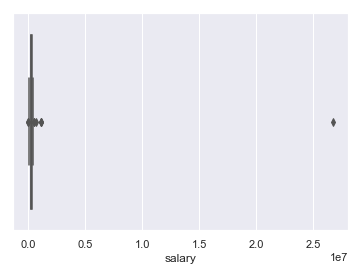

In [4]:
import seaborn as sns
sns.set(palette='muted')
%matplotlib inline

ax = sns.boxplot('salary', data = df)

We've found our first outlier. There's a salary orders of magnitude bigger than the rest. I suspect its 'Total', given I've encountered it before in the EDA lessons. I'll filter the dataset to find the records that have very high salaries.

In [5]:
df[df['salary'] > 1000000]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,NaN,14622185.0,...,2000000.0,21.0,7427621.0,6.0,False,NaN,-3367011.0,1617011.0,mark.frevert@enron.com,242.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0
SKILLING JEFFREY K,1111258.0,3627.0,NaN,8682716.0,19250000.0,5600000.0,6843672.0,2042.0,NaN,26093672.0,...,NaN,108.0,22122.0,30.0,True,NaN,NaN,1920000.0,jeff.skilling@enron.com,88.0
TOTAL,26704229.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,...,83925000.0,NaN,42667589.0,NaN,False,1398517.0,-27992891.0,48521928.0,NaN,NaN


I've confirmed it's the Total, so next step is to drop it from the data.

In [6]:
df = df.drop(['TOTAL'])

Without the totals entry, the boxplot for the salary will certainly look different:

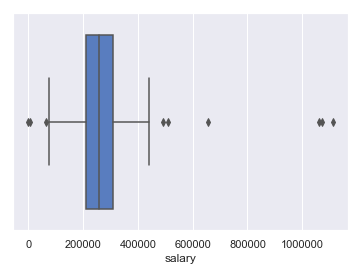

In [7]:
ax = sns.boxplot('salary', data = df)

Now I'll take a look at the *total_payments* and *bonus*:

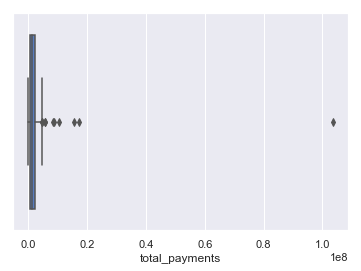

In [8]:
ax = sns.boxplot('total_payments', data = df)

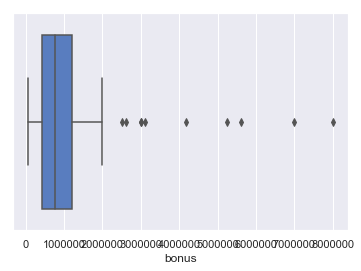

In [9]:
ax = sns.boxplot(x ='bonus', data = df)

In 'Total payments' there's a data point very far ahead of the rest so lets take a  deeper look, see if we can remove it.

In [10]:
df[df['total_payments'] > 40000000][['total_payments', 'poi']]

,total_payments,poi
LAY KENNETH L,103559793.0,True


Sadly, it's a POI, and a huge one, Lay Kenneth, so it has to stay. It seems the important outlier to get rid of was the totals. The data is already scarse so removing more won't do many favors, especially since most of the outliers in the boxplots are POIs.

### Features and observations

Now that I removed the main outlier of the dataset, I'll count the number of observations and how many features are available.

In [11]:
df.shape

(145, 21)

The data contains a total of **145 observations**, with **21 features**. However, we already saw there are some empty values, and we don't want to use features that have a lot of them. So, I'll check which of the features have many mising values.

In [12]:
# First, count the entries for each feature
f_count = df.count()

# Then, count the POIs found in each one
p_count = df[df['poi']].count()

# Finally group them on a single table and print
final = pd.concat([f_count, p_count], axis = 1)
final.columns = ['Records', 'POIs']

final


,Records,POIs
salary,94,17
to_messages,86,14
deferral_payments,38,5
total_payments,124,18
exercised_stock_options,101,12
bonus,81,16
restricted_stock,109,17
shared_receipt_with_poi,86,14
restricted_stock_deferred,17,0
total_stock_value,125,18


The POI feature is the one that's available for every single row. It clearly shows we have a total of **145 observations**, of which only **18 are POIs**. Since this number is low, I'll narrow down the list to show features that have less than 50 entries.

In [13]:
final[final['Records'] < 50]

,Records,POIs
deferral_payments,38,5
restricted_stock_deferred,17,0
loan_advances,3,1
director_fees,16,0
deferred_income,48,11


The first four features on this list don't seem very useful. restricted_stock_deferred and director_fees have no information on POI, while loan_advances and deferral_payments have few observations (3 and 38), so I'll drop them all from my final feature list. Deferred_income has data on 11 POI, so it makes the cut. That leaves us with **17 features**.

Additionaly, the email_address one is categorical data unique to every person, so I won't be using that when building a model. Thus, the final feature list is as follows:

In [14]:
features_list = ['poi', 'salary', 'total_payments', 'bonus', 'deferred_income',
                 'total_stock_value', 'expenses', 'exercised_stock_options', 'other',
                 'long_term_incentive', 'restricted_stock', 'to_messages', 
                 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',
                 'shared_receipt_with_poi']

## Feature engineering

In the final list of features I'm going to use, there are some features that are clearly related. For example, salary and bonuses are part of the total payments. And many email features are related to POIs in different ways. In order to take advantage of this, I'll define two new features:

1. *bonus_percent*: Defined as the fraction of bonuses to the total payments, describes how much of the money came from bonuses.

2. *poi_messages*: The sum of the poi-related email features: from_poi_to_this_person, from_this_person_to_poi, shared_receipt_with_poi.

I'll implement these features in the pandas dataframe for convenience, and then export it back to a dict. Also, boxplots for each of the new variables, to check if there are some crazy outliers like last time.

In [15]:
df['bonus_percent'] = df['salary']/df['total_payments']
df['poi_messages'] = df['from_poi_to_this_person']+df['from_this_person_to_poi']+df['shared_receipt_with_poi']

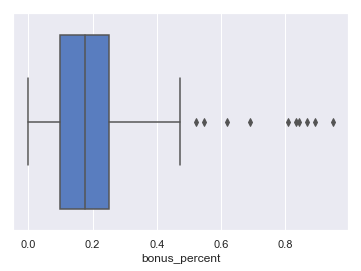

In [16]:
ax = sns.boxplot(x ='bonus_percent', data = df)

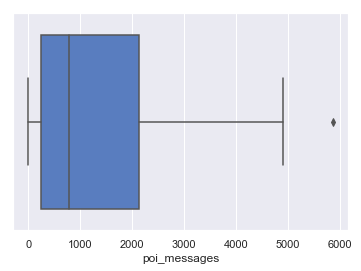

In [17]:
ax = sns.boxplot(x ='poi_messages', data = df)

There aren't any notable outliers so we're good to go. This concludes the data exploration so it's time to export the dataframe back to a dictionary.

In [18]:
df = df.fillna('NaN')
my_dataset = df.T.to_dict()

## Building a model
----
The next step is to build the model, and to begin I'll define it's characteristics and the process of deciding what will go into it.

### Optimizing features

Now that we've treated the outliers and removed some features that didn't provide adequate information, it's time to check which of the remaining features are useful and which aren't. Also, I created two new features:

In [19]:
new_features = ['bonus_percent', 'poi_messages']

I'll add these two to the complete feature list that will go into training the classifier. This gives us a total of 17 features, without counting POI.

As the feature number is still quite high, I will use sklearn's **SelectKBest** method in order to narrow the list down to 10 o 5, as well as measure the individual performance of each feature.

### The classification algorithm

This dataset is fairly small and the features aren't complex. Therefore, I will use classfiers I learned about in the lessons, namely these two:

1. Support vector machine classifier: Because the data seems to be linearly separable, so the linear kernel might work. Otherwise, I can also test the RBF kernel, which won't take an eternity to train due to the small sampling size.

2. Adaptive boosting: This algorithm was the best performer in the lessons. It's build with decision trees so it doesn't require any feature scaling to work properly. It's adaptive nature can work well with data like this, where the POIs are few.

3. K-nearest neighbors: A classic classifier, which assigns the classes most common amongst a data point's neighboors.

### Tuning

I will use sklearn's **pipeline** in order to build the models and **GridSearchCV** to exhaustively consider all parameter combinations and then find the best one. The two algorithms considered have different parameters. The main ones being:

* SVM

| Parameter     | Affects                                                                                            |
|:--------------|:---------------------------------------------------------------------------------------------------|
| C             | The tradeoff between smooth decision boundary and classifying training points correctly.  |
| gamma         | The radius of influence of a single training example.                                     |

* AdaBoost

| Parameter     | Affects                                                    |
|:--------------|:-----------------------------------------------------------|
| n_estimators  | The number of estimators.                                  |
| learning_rate | Shrinks the contribution of each estimator by this number. |

* K-neighbors

| Parameter     | Affects                                                    |
|:--------------|:-----------------------------------------------------------|
| p  | Power parameter for the Minkowski metric.                                  |
| n_neighbors   | Number of neighbors |

Tuning parameters have effects on the performance of an algorithm. They must be selected in order to balance the accuracy without overfitting.

### Evaluation

In order to evaluate the performance of the model, we'll look at the accuracy, precision and recall:

* *Accuracy* is the fraction of predictions that the classfier gets right. It is the number of correct predictions, divided by the total number of predictions made.

* *Precision* and *recall* are measures of relevance:
    * Precision: Out of all the items labelled as positive, how many truly belong to the positive class?
    * Recall: Out of all the items that are truly positive, how many were correctly classified as positive?
 
*Recall is worse when the classifier has many false negatives, while precision is worse when it labels too many false positives.*

In our dataset, a precision of 1 would mean that the algorithm marked all the POIs correctly. Real life, however, isn't perfect, so precision will be lower, and that means that there are some employees that are not POIs, that will get mistakenly marked as such.

Recall, on the other hand, measures the false negatives. A recall of 1 would mean that the algorithm correctly marked all POIs as such. A lower score, however, means that there are some POIs that got marked as non-POIs, in other words, POIs that the algorithm misses.

### Validation

In order to measure these scores, a validation strategy must be defined. A common strategy is to do cross validation, splitting the dataset in various parts, traning with some and testing with the rest. In this case, however, our data has very little POIs compared to "normal" people, so these dataset splits must be smart. This is where *Stratified ShuffleSplit cross-validation* is used, as it returns random folds, while preserving the percentage of samples for each class in the splits made.

It's important that validation is done in this random way. Let's say, for example, we split the dataset 70/30, but all the POIs are in the final 30%. What will happen is that the algorithm will never see a POI and so will never classify one correctly when it sees one. This cross-validation method guarantees that every fold will have the same percentage of POIs in it. Also, in order to make up for the lack of data, many different folds are created for training and testing, and the results of each training is aggregated into one final model.

The validation method is implemented in the *tester.py* file, so I simply import the *test_classifier* method to measure the precision and recall of the model. This particular method employs the *Stratified ShuffleSplit* with a total of 1.000 folds.

## Testing the models
----

Now's the time to implement the models and evaluate their performance in order to define which is better. I'll use sklearn's **pipeline** and **GridSearchCV** as mentioned before to build both models, and test with the provided function.

In [20]:
## Mute the warnings that pop up when testing precision
import warnings
warnings.simplefilter("ignore")

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

import tester

C:\Users\Enrique\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Next, update the feature list with the created features and split the data into labels and features. With this, it's time to set up the classification algorithms.

In [21]:
features_list += new_features

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Support Vector Machine

First up is the SVC. I'll be testing both the linear and rbf kernels, while varying C and gamma. This particular method relies on distances, so in order to rescale the data I import the **Standard Scaler**, so features are converted to mean zero and variance 1.

In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

pipe_A = Pipeline([
    ('scaling', StandardScaler()),
    ('feature_select', SelectKBest()),
    ('svm', SVC())
])

param_grid = [{'feature_select__k': [5, 10, 'all'],
               'svm__C': [1, 50, 100, 1000],
               'svm__gamma': [0.5, 0.1, 0.01],
               'svm__kernel': ['linear', 'rbf']
              }]

svm_class = GridSearchCV(pipe_A, cv=3, n_jobs=1, param_grid=param_grid,
                         scoring=['precision','recall'], refit='recall').fit(features, labels)

tester.test_classifier(svm_class.best_estimator_, my_dataset, features_list)

Pipeline(memory=None,
     steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('feature_select', SelectKBest(k='all', score_func=<function f_classif at 0x000000000B2C9898>)), ('svm', SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.86533	Precision: 0.49089	Recall: 0.26950	F1: 0.34797	F2: 0.29622
	Total predictions: 15000	True positives:  539	False positives:  559	False negatives: 1461	True negatives: 12441



The grid search for the SVC found that the best results are obtained when using the rbf kernel, with a C of 100 and gamma 0.01. This particular combination resulted in a precision of 0.49 and recall of 0.27.

Now, let's see how the features scored. For this, I get the scores from the SelectKBest object, then build a plot with seaborn that shows the scores in order:

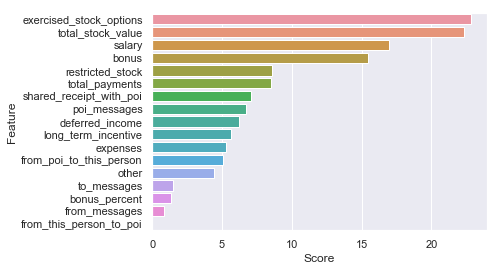

In [23]:
scores = svm_class.best_estimator_.get_params()['feature_select'].scores_

feature_scores_A = pd.DataFrame({'Feature':features_list[1:],'Score':scores}).sort_values('Score', ascending=False)

ax = sns.barplot(x = "Score", y = "Feature", data = feature_scores_A, orient = 'h')

The model used the all of the features. Of the ones I created, only one made the top 10, and that is *poi_messages*. The other one, *bonus_percent*, is one of the lowest scoring features.

### AdaBoost

Adaptive boosting uses the decision tree as it's base algorithm by default, and that's what I'm using. Contrary to the SVC, this one doesn't use distance for calculation, so it's not necessary to rescale the features. That said, let's test this one:

In [24]:
from sklearn.ensemble import AdaBoostClassifier

pipe_B = Pipeline([
    ('feature_select', SelectKBest()),
    ('ada', AdaBoostClassifier())
])

param_grid = [{'feature_select__k': [5, 10, 'all'],
               'ada__n_estimators': [30, 50, 100],
               'ada__learning_rate': [0.5, 0.8, 1]
              }]

ada_class = GridSearchCV(pipe_B, cv=3, n_jobs=1, param_grid=param_grid,
                    scoring=['precision','recall'], refit='recall').fit(features, labels)

tester.test_classifier(ada_class.best_estimator_, my_dataset, features_list)

C:\Users\Enrique\Anaconda3\envs\py27\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Pipeline(memory=None,
     steps=[('feature_select', SelectKBest(k=10, score_func=<function f_classif at 0x000000000B2C9898>)), ('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=30, random_state=None))])
	Accuracy: 0.84587	Precision: 0.37086	Recall: 0.22400	F1: 0.27930	F2: 0.24327
	Total predictions: 15000	True positives:  448	False positives:  760	False negatives: 1552	True negatives: 12240



For the adaboost algorithm, it found that the best parameters are a learning rate of 0.5 and 30 estimators. This model obtained a precision score of 0.37 and a recall of 0.22. The performance is a bit worse than the SVM.

Now, I check the feature scores again, since this time we didn't scale them:

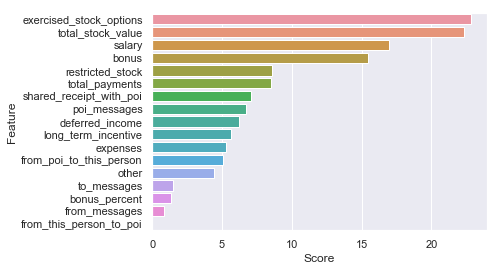

In [25]:
scores = ada_class.best_estimator_.get_params()['feature_select'].scores_

feature_scores_A = pd.DataFrame({'Feature':features_list[1:],'Score':scores}).sort_values('Score', ascending=False)

ax = sns.barplot(x = "Score", y = "Feature", data = feature_scores_A, orient = 'h')

The scores didn't change. The only difference is that in this model, SelectKBest took the 10 best features for training the classifier. These features are the top scoring ones from the bar plot, from exercised_stock_options to long_term_incentive. This means that one of the created features, *poi_messages*, made it into the 10 features used for the adaboost classifier. The other one, *bonus percent*, is quite weak and has been discarded.

### k-nearest neighbors

This classifier is the simplest among the three used. Mainly, I'll be varying the number of neighbors. I'm not scaling the features this time.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

pipe_C = Pipeline([
    ('feature_select', SelectKBest()),
    ('kn', KNeighborsClassifier())
])

param_grid = [{'feature_select__k': [5, 10, 'all'],
               'kn__n_neighbors': [3, 5, 7, 10],
               'kn__p': [1, 2]
              }]

lr_class = GridSearchCV(pipe_C, cv=3, n_jobs=1, param_grid=param_grid,
                    scoring=['precision','recall'], refit='recall').fit(features, labels)

tester.test_classifier(lr_class.best_estimator_, my_dataset, features_list)

Pipeline(memory=None,
     steps=[('feature_select', SelectKBest(k=5, score_func=<function f_classif at 0x000000000B2C9898>)), ('kn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform'))])
	Accuracy: 0.88580	Precision: 0.63680	Recall: 0.33400	F1: 0.43818	F2: 0.36910
	Total predictions: 15000	True positives:  668	False positives:  381	False negatives: 1332	True negatives: 12619



This is clearly the best performing method. With 3 neighbors and p=1, the k-nearest algorithm has the best precision and recall, with 0.64 and 0.33, respectively. This time, the top 5 features were used, so none of the engineered features made the cut.

### The final model

Using precision and recall as the performance metric, the K-neighbors classifier had the best performance out of the three, beating SVM and AdaBoost. Based on the grid search results, the best parameters for this algorithm are:

* n_neighbors: 3
* p: 1

Everything else uses the default. Also, the SelectKBest algorithm chose the best 5 features, which are:

1. exercised_stock_options
2. total_stock_value
3. salary
4. bonus
5. restricted_stock

This means that none of the engineered features were used. In order to measure their impact, I'll train the k-nearest neighbors method one more time, but without the new features.

In [27]:
features_list = ['poi', 'salary', 'total_payments', 'bonus', 'deferred_income',
                 'total_stock_value', 'expenses', 'exercised_stock_options', 'other',
                 'long_term_incentive', 'restricted_stock', 'to_messages', 
                 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',
                 'shared_receipt_with_poi']

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

clf = Pipeline([
    ('feature_select', SelectKBest(k = 5)),
    ('kn', KNeighborsClassifier(n_neighbors = 3, p = 1))
])

tester.test_classifier(clf, my_dataset, features_list)

Pipeline(memory=None,
     steps=[('feature_select', SelectKBest(k=5, score_func=<function f_classif at 0x000000000B2C9898>)), ('kn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform'))])
	Accuracy: 0.88593	Precision: 0.63854	Recall: 0.33300	F1: 0.43773	F2: 0.36824
	Total predictions: 15000	True positives:  666	False positives:  377	False negatives: 1334	True negatives: 12623



The scores are very similar, with the accuracy and precision slightly higher, and the recall slightly lower. This means the created features didn't have much on the training and the final algorithm's performance. In addition, it's better that it stays this way, since the better feature was a simple linear combination of three different ones.

## Closing remarks
----
Identifying persons of interest from the Enron dataset was always going to be a difficult task. There are few data points available and it was even difficult to point at POIs in plots. Three classification algorithms were tried, and only one was good enough in precision and recall. Overall, this project was an excellent learning experience in how features, outliers and even choice of algorithm affect the performance of classifiers. Outliers drive down performance, some features might not be useful at all, and this shows the importance how having good data before programming algorithms. Also, sometimes the most complex algorithms might not be the best ones for the task. 

Machine learning is difficult in that there is not always a clear-cut solution for each case. That's why trying different things is important and this project clearly shows why.